# Linear Regression

## Importing packages

In [2]:
# Packages needed

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns


## Data importing

In [3]:
# Read and Convert csv file to dataframe

insurance_data = pd.read_csv("insurance.csv")

insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Get a closer look at the dataset

Check for null values

In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check for duplicates

In [5]:
insurance_data.duplicated().sum()

1

Remove duplicates

In [6]:
insurance_data.drop_duplicates(inplace = True)

insurance_data.duplicated().sum()

0

## Preprocessing

Linear regression model deals with numerical input only, there are 3 non numerical features.

Dealing with the 3 non numerical features.

1. Sex

In [7]:
# how many different values are in the sex column

insurance_data["sex"].unique()

array(['female', 'male'], dtype=object)

In [8]:
# since there are 2 unique values
# assign 'male' to 1 and 'female' to 2
insurance_data["sex"] = insurance_data["sex"].map({'male': 1, 'female': 2})

insurance_data["sex"] 

0       2
1       1
2       1
3       1
4       1
       ..
1333    1
1334    2
1335    2
1336    2
1337    2
Name: sex, Length: 1337, dtype: int64

2. Smoker

In [9]:
# how many different values are in the smoker column

insurance_data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [10]:
# assign 'yes to 1 and 'no to 0

insurance_data["smoker"]= insurance_data["smoker"].map({'yes': 1, 'no': 0})

insurance_data["smoker"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1337, dtype: int64

3. Region

In [11]:
# how many different values are in the smoker column

insurance_data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
# assign 'southwest'to 1, 'southeast to 2,
#        'northwest'to 3, 'northeast'to 4

insurance_data["region"]= insurance_data["region"].map({'southwest': 1, 'southeast': 2,'northwest': 3, 'northeast': 4})

insurance_data["region"]

0       1
1       2
2       2
3       3
4       3
       ..
1333    3
1334    4
1335    2
1336    1
1337    3
Name: region, Length: 1337, dtype: int64

Relook at the data

In [13]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


## Exploratory data analysis (EDA)

In [14]:
# correlation between features
insurance_data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.109344,0.041536,-0.025587,-0.001626,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,0.004936,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,-0.157574,0.198401
children,0.041536,-0.017848,0.012755,1.000000,0.007331,-0.016258,0.067389
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.002358,0.787234
region,-0.001626,0.004936,-0.157574,-0.016258,0.002358,1.000000,0.006547
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,0.006547,1.000000


In [15]:
# average and variance of the features
insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
sex,1337.0,1.495138,0.500163,1.0000,1.000,1.0000,2.00000,2.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
smoker,1337.0,0.204936,0.403806,0.0000,0.000,0.0000,0.00000,1.00000
region,1337.0,2.483919,1.105208,1.0000,2.000,2.0000,3.00000,4.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


Children and region features have low correlation , drop them

In [16]:
insurance_data = insurance_data.drop(["children", "region"], axis=1)
insurance_data

,age,sex,bmi,smoker,charges
0,19,2,27.900,1,16884.92400
1,18,1,33.770,0,1725.55230
2,28,1,33.000,0,4449.46200
3,33,1,22.705,0,21984.47061
4,32,1,28.880,0,3866.85520
...,...,...,...,...,...
1333,50,1,30.970,0,10600.54830
1334,18,2,31.920,0,2205.98080
1335,18,2,36.850,0,1629.83350
1336,21,2,25.800,0,2007.94500


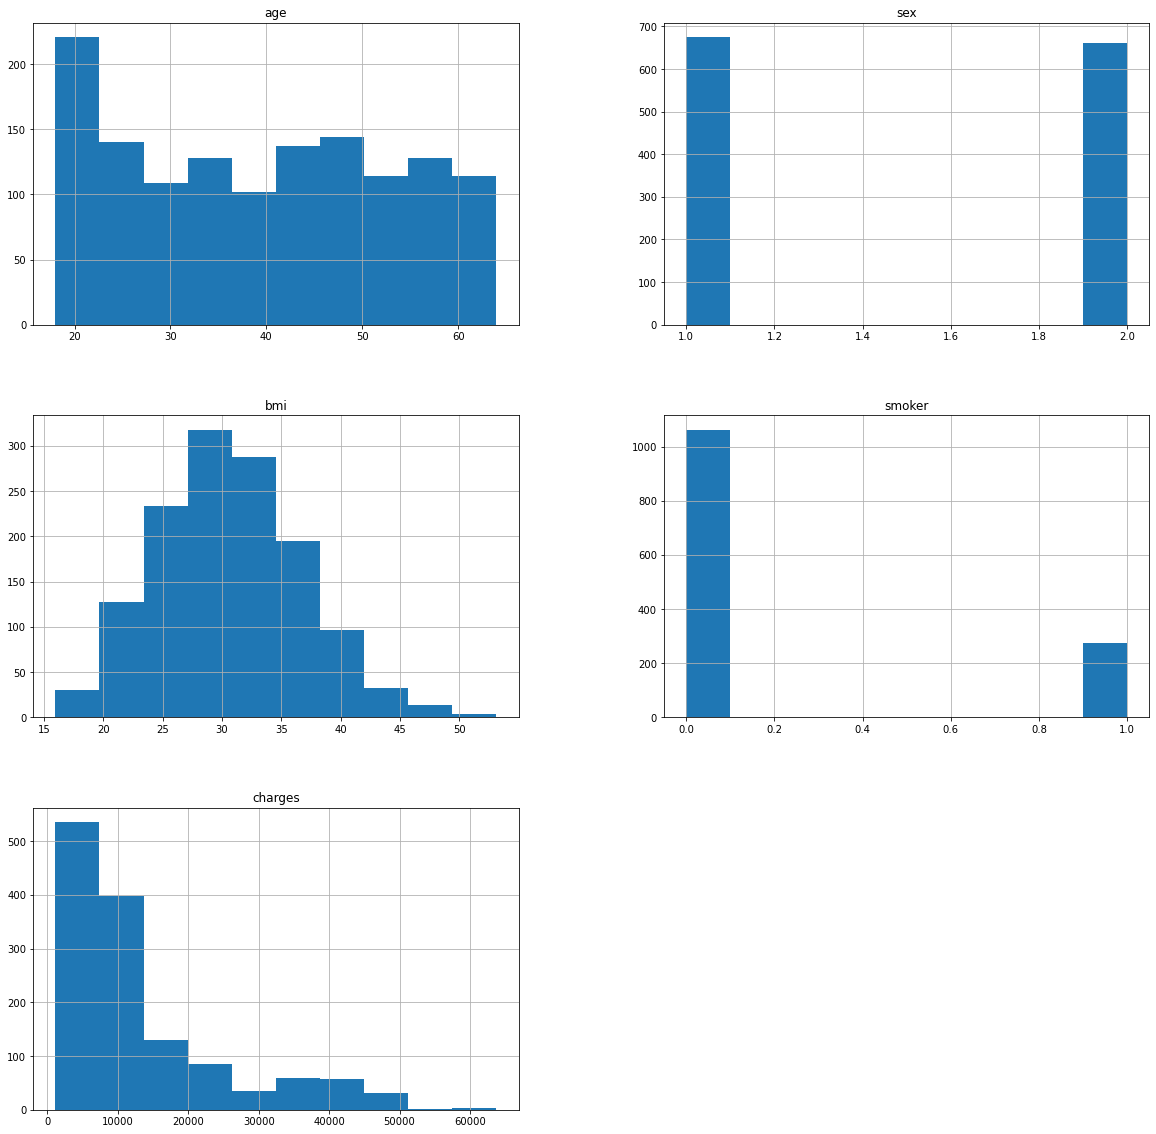

In [17]:
insurance_data.hist(figsize = (20,20))

plt.show()

## Outliers

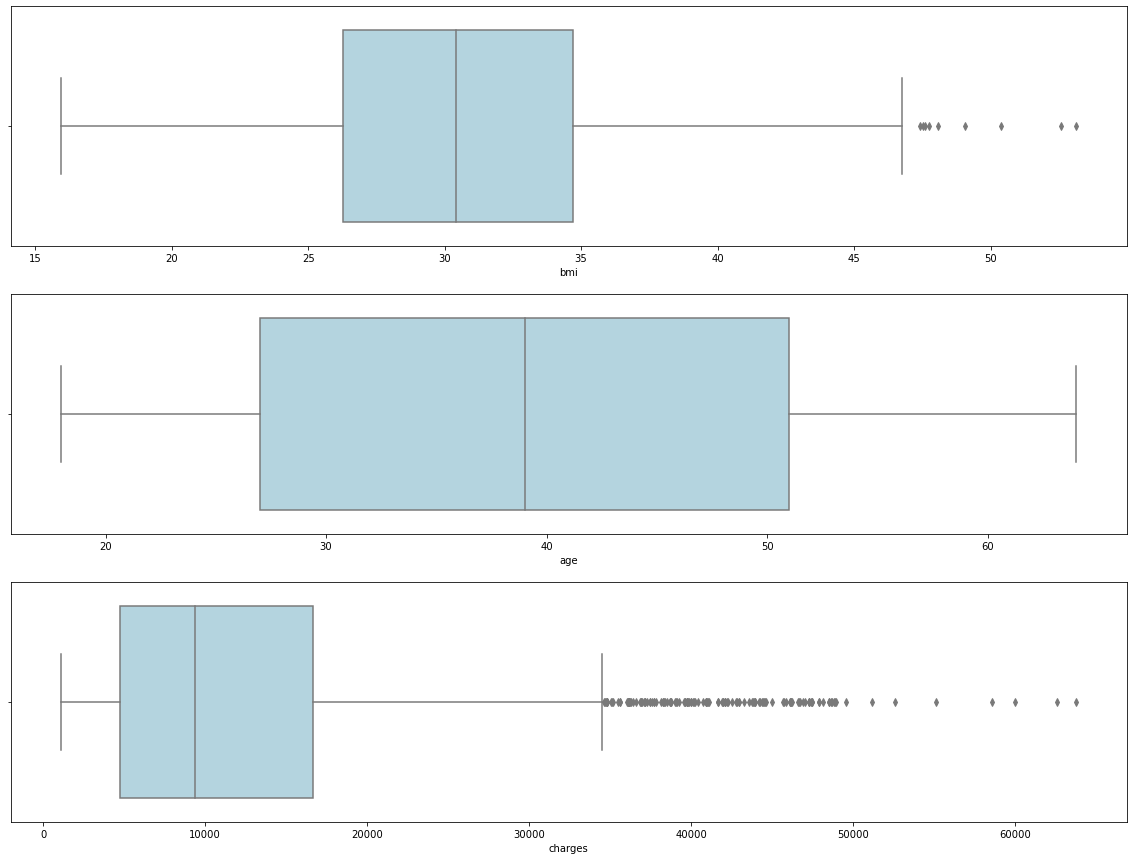

In [18]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_data.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= insurance_data.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_data.charges, color='lightblue')

plt.show()

Remove outliers

In [19]:
columns_to_test = ['age', 'bmi', 'charges']

for i in columns_to_test:
    Q3 = insurance_data[i].quantile(.75)
    Q1 = insurance_data[i].quantile(.25)
    IQR = Q3 - Q1

    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR

    lower_values = insurance_data[i] >  upper_whisker
    upper_values = insurance_data[i] <  lower_whisker

    insurance_data.loc[lower_values, i] = upper_whisker
    insurance_data.loc[upper_values, i] = lower_whisker

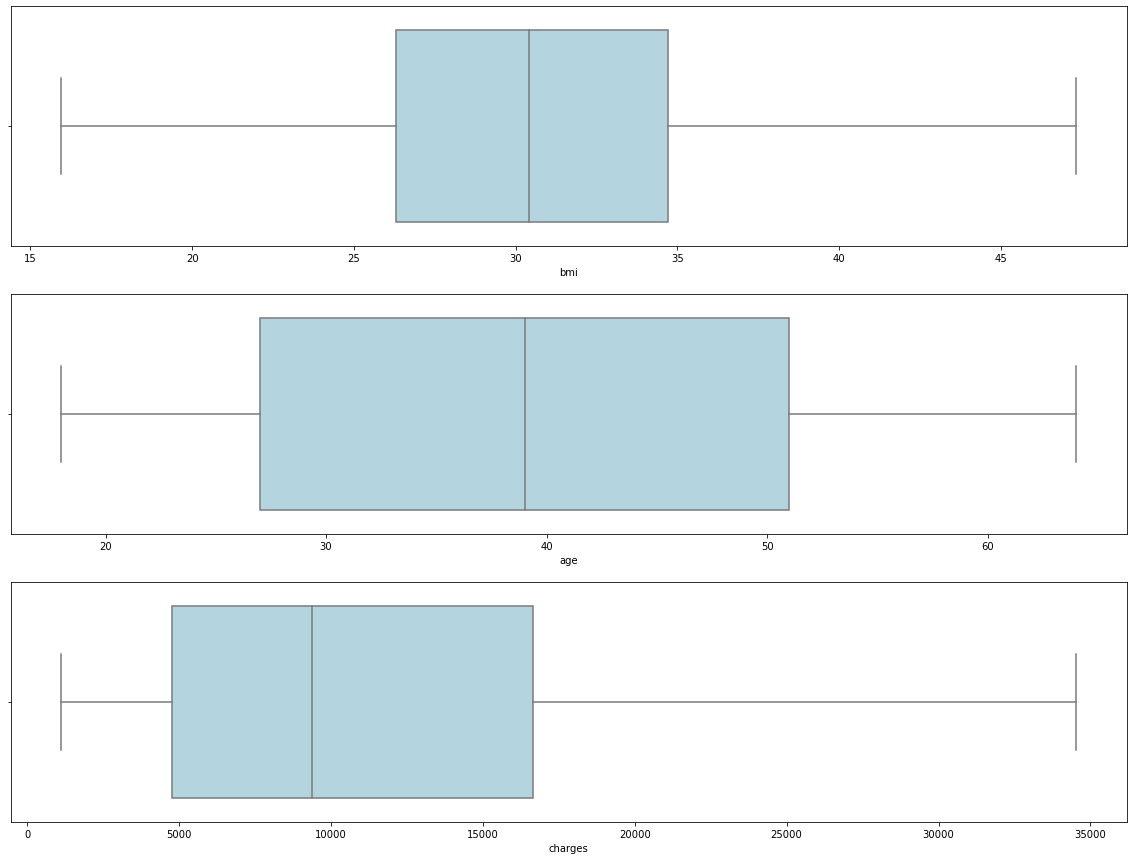

In [20]:
import seaborn as sns

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_data.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= insurance_data.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_data.charges, color='lightblue')

plt.show()

## Standardization

In [21]:
def standardize_features(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    standardized_X = (X - means) / stds
    return standardized_X

In [22]:
insurance_data = standardize_features(insurance_data)
insurance_data

,age,sex,bmi,smoker,charges
0,-1.440418,1.009771,-0.454032,1.969660,0.432384
1,-1.511647,-0.990324,0.515033,-0.507702,-1.059429
2,-0.799350,-0.990324,0.387915,-0.507702,-0.791373
3,-0.443201,-0.990324,-1.311662,-0.507702,0.934224
4,-0.514431,-0.990324,-0.292246,-0.507702,-0.848706
...,...,...,...,...,...
1333,0.767704,-0.990324,0.052787,-0.507702,-0.186053
1334,-1.511647,1.009771,0.209621,-0.507702,-1.012150
1335,-1.511647,1.009771,1.023503,-0.507702,-1.068848
1336,-1.297958,1.009771,-0.800716,-0.507702,-1.031639


## Features and Label

In [23]:
# Get features from data

X = insurance_data.drop("charges", axis=1)

X 

,age,sex,bmi,smoker
0,-1.440418,1.009771,-0.454032,1.969660
1,-1.511647,-0.990324,0.515033,-0.507702
2,-0.799350,-0.990324,0.387915,-0.507702
3,-0.443201,-0.990324,-1.311662,-0.507702
4,-0.514431,-0.990324,-0.292246,-0.507702
...,...,...,...,...
1333,0.767704,-0.990324,0.052787,-0.507702
1334,-1.511647,1.009771,0.209621,-0.507702
1335,-1.511647,1.009771,1.023503,-0.507702
1336,-1.297958,1.009771,-0.800716,-0.507702


In [24]:
# Get labels from data

y = insurance_data["charges"]

y

0       0.432384
1      -1.059429
2      -0.791373
3       0.934224
4      -0.848706
          ...   
1333   -0.186053
1334   -1.012150
1335   -1.068848
1336   -1.031639
1337    1.638524
Name: charges, Length: 1337, dtype: float64

In [25]:
insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,-5.480533e-17,1.000374,-1.511647,-0.870580,-0.015823,0.838934,1.764921
sex,1337.0,-3.172066e-16,1.000374,-0.990324,-0.990324,-0.990324,1.009771,1.009771
bmi,1337.0,2.004048e-15,1.000374,-2.425178,-0.719823,-0.041313,0.668564,2.751145
smoker,1337.0,-1.150912e-16,1.000374,-0.507702,-0.507702,-0.507702,-0.507702,1.969660
charges,1337.0,-3.761638e-16,1.000374,-1.118836,-0.762157,-0.305559,0.410025,2.168298


SPLITTING

In [26]:
# Data split to training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

## SKLEARN

In [27]:
# Get the linear regresion model

lin_reg_sktl = LinearRegression().fit(X_train , y_train)

In [28]:
# predict

predict_sktl = lin_reg_sktl.predict(X_test)

In [29]:
score_sktl = lin_reg_sktl.score(X_test,y_test)
score_sktl

0.725352374340205

## From Scratch

In [30]:
class LinearRegression_scratch() :
    """
    Linear regression model for predicting target variables.
    """

    def __init__( self, learning_rate, iterations) :
        """
        Initialize the LinearRegression object.

        Parameters:
        - learning_rate (float): The learning rate for gradient descent optimization.
        - iterations (int): The number of iterations for gradient descent optimization.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit( self, X, Y ) :
        """
        Fit the linear regression model .

        Parameters:
        - X : The input features of the training data.
        - Y : The label values of the training data.

        Returns:
        - self : The LinearRegression object after fitting.
        """
        self.m, self.n = X.shape       # Get the number of samples (m) and features (n).
        self.W = np.zeros( self.n )    # weight initialization, initialize w to 0
        self.b = 0                     # initialize bias (b) to 0
        self.X = X                     # initialize the training set
        self.Y = Y                     # initialize the target values

        # Gradient descent 
        for i in range( self.iterations ) :
            self.update_weights()

        return self


    def update_weights( self ) :
        """
        Update the weights and bias of the linear regression model using gradient descent.
        """
        Y_pred = self.predict( self.X )

        # Calculate gradients
        
        dW = ( ( self.X.T ).dot( Y_pred - self.Y  )  ) / self.m 
       
        db =  np.sum( Y_pred - self.Y ) / self.m  

        # Update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        
        return self
        
    def predict( self, X ) :
        """
        Predict the target values for the input features.
        
        Parameters:
        - X : The input features.
        
        Returns:
        - y_pred : The predicted target values.
        """
        y_pred =  X.dot( self.W ) + self.b
        return y_pred   
    
    def score(self,y_test,y_pred):
        """
        Calculate the R^2 score of the model

        Parameters:
        - y_test : The true target values.
        - y_pred : The predicted target values.

        Returns:
        - r2_score (float): The R^2 score of the linear regression model.
        """
        ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
        ss_residual = np.sum((y_test - y_pred) ** 2)
        r2_score = 1 - (ss_residual / ss_total)
        return r2_score



In [31]:
# create a linear regression object

lin_reg_scratch = LinearRegression_scratch( learning_rate=0.05, iterations= 1000)

In [32]:
# fitting the model

lin_reg_scratch.fit(X_train,y_train)


In [33]:
# predict

predict_scratch = lin_reg_scratch.predict(X_test)


In [34]:
# evaluate the model

score_scratch = lin_reg_scratch.score(y_test , predict_scratch)
score_scratch

0.725352374340205

## Comparing the results

In [35]:
print("The Evaluation scores :" )
print("The sckit learn model r2 score =" , score_sktl)
print("The implemented model r2 score =" , score_scratch)

The Evaluation scores :
The sckit learn model r2 score = 0.725352374340205
The implemented model r2 score = 0.725352374340205


After some preproccesing on the dataset, we achieved the same result for both of the models.